# Neural Net testing

In [1]:
import numpy as np                                                              
import matplotlib.pyplot as plt
%matplotlib inline

import neuralNet as nn
import utils as u

## One variable function testing

In [2]:
testFunc = lambda x: np.sin(2 * x)

inputs = np.linspace(-np.pi, np.pi, 200)
outputs = testFunc(inputs)

sizes = [1, 100, 100, 1]

## For cosine, need different nonlinearity
#model = nn.NeuralNet(sizes, nonLin='sigmoid')
model = nn.NeuralNet(sizes, nonLin='tanh')

it, E_ins = model.learn(inputs, outputs, maxIters=1000, trackE_in=True)

/Users/akshayyeluri/anaconda3/envs/neural/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


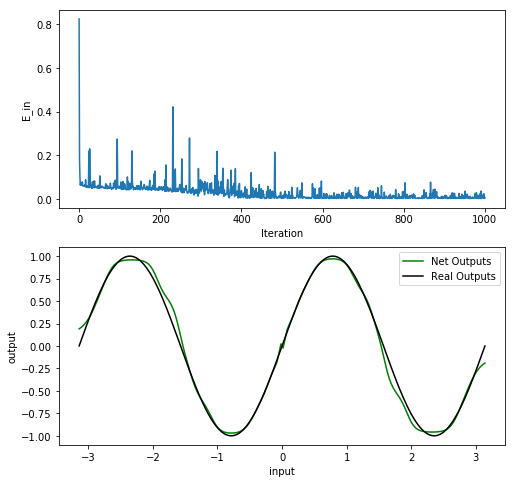

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

u.plotE_ins(E_ins, axis=ax[0])
model.quickPlot(inputs, outputs, axis=ax[1])

fig.show()

In [4]:
inputs = np.random.uniform(-np.pi, np.pi, 20)
outputs = testFunc(inputs)

outputs2 = np.array([model.calculate(i) for i in inputs])
outputs2 - outputs

array([ 0.05427082, -0.09989394,  0.00069901, -0.00016084, -0.00850151,
       -0.0289063 ,  0.00072658,  0.0296406 , -0.02508069,  0.0297511 ,
        0.00849567,  0.01378574,  0.04638793, -0.11822862,  0.001377  ,
       -0.01910388,  0.01998462,  0.00185577,  0.00877609, -0.0118618 ])

## Multi-Variable Function Testing

In [5]:
testFunc = lambda x, y: np.cos(x + y)

inputs = np.linspace(-np.pi / 2, np.pi / 2, 100)
inputs = np.vstack((inputs / 3, inputs * 2 / 3)).T
outputs = testFunc(inputs[:, 0], inputs[:, 1])

sizes = [2, 100, 100, 1]

model = nn.NeuralNet(sizes, nonLin='sigmoid')
#model = nn.NeuralNet(sizes)

it, E_ins = model.learn(inputs, outputs, maxIters=1000, trackE_in=True)

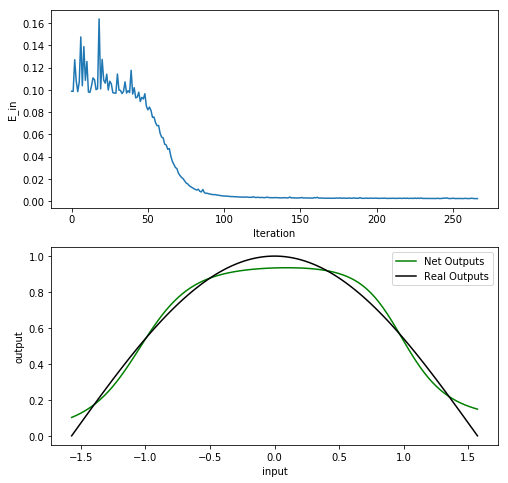

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

u.plotE_ins(E_ins, axis=ax[0])

ax[1].plot(np.sum(inputs, axis=1), [model.calculate(i) for i in inputs], color='g', label='Net Outputs')
ax[1].plot(np.sum(inputs, axis=1), outputs, color='k', label='Real Outputs')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')
ax[1].legend()

fig.show()

In [7]:
inputs = np.random.uniform(-np.pi, np.pi, 20)
inputs = np.vstack((inputs / 3, inputs * 2 / 3)).T
outputs = testFunc(inputs[:, 0], inputs[:, 1])

outputs2 = np.array([model.calculate(i) for i in inputs])
outputs2 - outputs

array([ 0.97527871,  0.95506202,  0.09120013, -0.04895837,  0.03532387,
       -0.04520487,  0.66263938,  0.19342546, -0.03619343,  0.71986362,
        0.03129848,  0.40757134,  0.81468999,  0.00251128,  0.21705378,
        0.64360144,  0.04610734, -0.06488645,  0.8721091 ,  0.91626291])

## MNIST

# XOR (doesn't work)

In [8]:
testFunc = lambda x: np.sum(np.atleast_2d(x), axis=1) % 2

n_max = 1024
nDigs = len(bin(n_max)[2:])
inputs = np.array([[int(i) for i in list(bin(x)[2:].zfill(nDigs))] for x in range(n_max)])
outputs = testFunc(inputs)

sizes = [nDigs, 100, 1]

model = nn.NeuralNet(sizes, loss='log', nonLin='sigmoid')

it, E_ins = model.learn(inputs, outputs, maxIters=100, trackE_in=True)

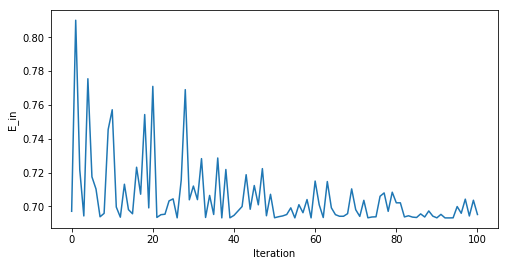

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

u.plotE_ins(E_ins, axis=ax)
#model.quickPlot(inputs, outputs, axis=ax[1])

fig.show()

outputs2 = np.round(np.array([model.calculate(i) for i in inputs]))